In [1]:
# Cargar modelo entrenado previamente
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
df = pd.read_csv("partidos_cebollitas.csv")

# Filtrar partidos donde Cebollitas FC juegue como local O visitante
df = df[(df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')]
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']
X = df[['posesion_local (%)', 'tiros_arco_local']]
y = df['diferencia_goles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [2]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1.73
R²: -0.69


In [3]:
if r2 < 0:
    print("❌ El modelo no explica la varianza. Peor que adivinar.")
elif r2 < 0.3:
    print("⚠️ El modelo explica muy poco. Posible underfitting.")
else:
    print("✅ El modelo tiene un poder explicativo aceptable.")

❌ El modelo no explica la varianza. Peor que adivinar.


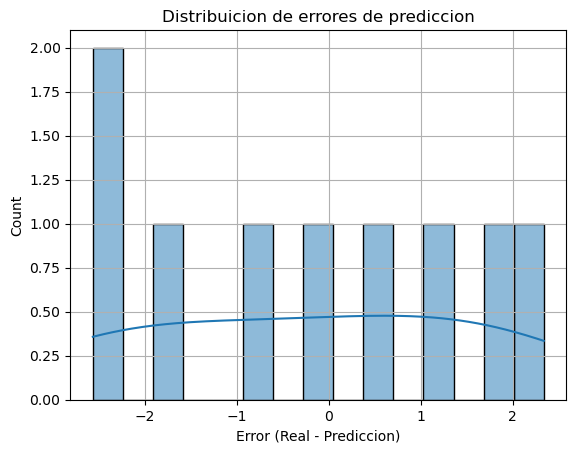

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribuicion de errores de prediccion')
plt.xlabel('Error (Real - Prediccion)')
plt.grid(True)
plt.show()

# 🧠 Reflexión
* ¿Qué te dicen estas métricas?
* ¿Crees que las variables usadas realmente capturan lo que determina la diferencia de goles?
* ¿Qué limitaciones tiene la regresión lineal para el fútbol?
* ¿Te parece que este modelo es suficiente para tomar decisiones deportivas?

# ✅ ¿Qué podrías probar ahora?
* Añadir nuevas variables (localidad, rival, tiros del rival)
* Probar otro tipo de modelo (Árboles, Random Forest, XGBoost)
* Usar validación cruzada
* Filtrar o transformar datos